In [1]:
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_images_and_labels(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename),cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (200, 200))
            images.append(img)
            labels.append(folder)
    return images, labels

In [3]:
cat_images, cat_labels = load_images_and_labels('Data/cats')
dog_images, dog_labels = load_images_and_labels('Data/dogs')
different_images, different_labels = load_images_and_labels('Data/unknown')

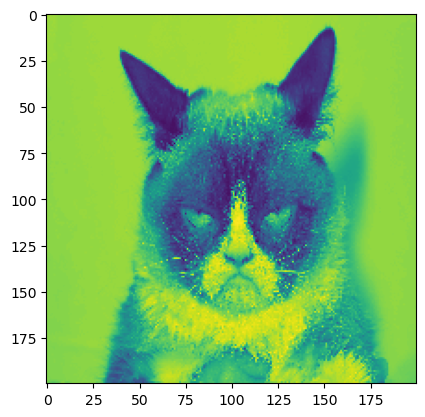

In [4]:
plt.imshow(cat_images[0])

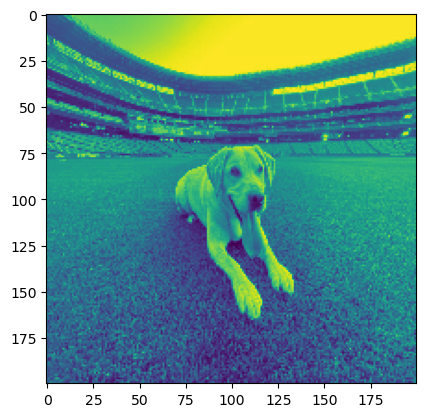

In [5]:
plt.imshow(dog_images[29])

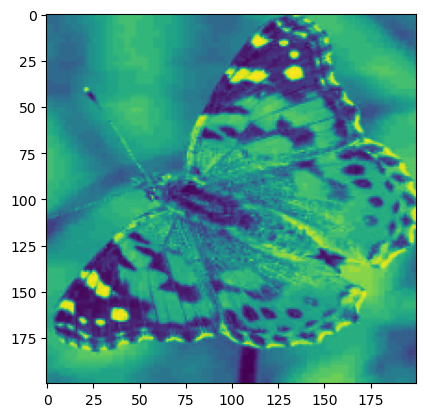

In [6]:
plt.imshow(different_images[0])

In [7]:
len(cat_images)

100

In [8]:
len(dog_images)

100

In [9]:
len(different_images)


100

In [10]:
dog_labels


['Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data/dogs',
 'Data

In [11]:
cat_labels

['Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data/cats',
 'Data

In [12]:
different_labels

['Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown',
 'Data/unknown

In [13]:
X = cat_images + dog_images + different_images
y = np.array(cat_labels + dog_labels + different_labels)


In [14]:
X[1]

array([[ 68,  64,  70, ..., 254, 254, 253],
       [ 69,  62,  66, ..., 254, 255, 253],
       [ 64,  58,  67, ..., 254, 255, 254],
       ...,
       [ 93,  94,  94, ..., 254, 255, 255],
       [114, 129, 100, ..., 254, 254, 255],
       [103,  95, 100, ..., 252, 252, 253]], dtype=uint8)

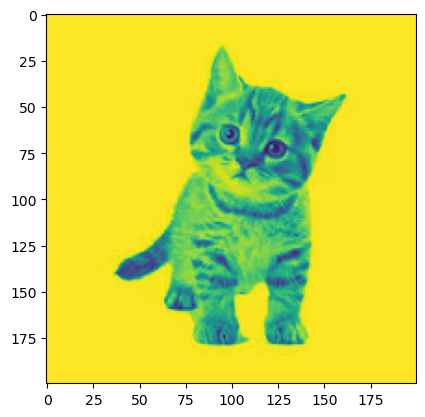

In [15]:
plt.imshow(X[9])

In [16]:
y[7]

'Data/cats'

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

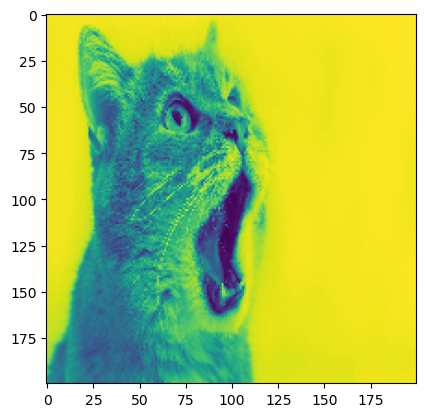

In [18]:
plt.imshow(X_train[1])

In [19]:
Y_train[1]

'Data/cats'

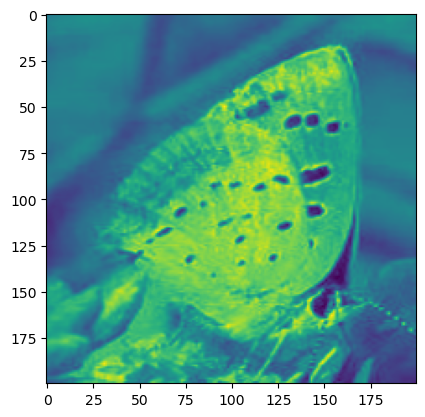

In [20]:
plt.imshow(X_test[0])

In [21]:
Y_test[0]

'Data/unknown'

In [22]:
X_train

[array([[ 86,  85,  83, ...,  86,  85,  85],
        [ 85,  83,  82, ...,  86,  85,  85],
        [ 84,  83,  81, ...,  86,  85,  85],
        ...,
        [188, 190, 191, ..., 172, 171, 173],
        [187, 190, 192, ..., 172, 171, 173],
        [189, 192, 194, ..., 172, 172, 172]], dtype=uint8),
 array([[249, 250, 250, ..., 255, 255, 255],
        [249, 249, 250, ..., 255, 255, 255],
        [249, 250, 250, ..., 255, 255, 255],
        ...,
        [162, 127, 113, ..., 249, 249, 249],
        [165, 135, 119, ..., 250, 249, 249],
        [163, 135, 118, ..., 250, 249, 249]], dtype=uint8),
 array([[124, 126, 126, ...,  99,  87,  89],
        [110, 110, 110, ..., 102,  89,  92],
        [ 92,  91,  95, ..., 103,  90,  96],
        ...,
        [186, 193, 195, ...,  56,  53,  51],
        [193, 195, 195, ...,  59,  53,  50],
        [192, 196, 196, ...,  59,  53,  50]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

In [23]:
Y_train

array(['Data/unknown', 'Data/cats', 'Data/cats', 'Data/dogs', 'Data/dogs',
       'Data/cats', 'Data/cats', 'Data/unknown', 'Data/cats', 'Data/dogs',
       'Data/dogs', 'Data/dogs', 'Data/unknown', 'Data/dogs', 'Data/dogs',
       'Data/unknown', 'Data/cats', 'Data/cats', 'Data/cats',
       'Data/unknown', 'Data/dogs', 'Data/dogs', 'Data/cats', 'Data/dogs',
       'Data/cats', 'Data/dogs', 'Data/dogs', 'Data/cats', 'Data/cats',
       'Data/cats', 'Data/dogs', 'Data/dogs', 'Data/cats', 'Data/unknown',
       'Data/cats', 'Data/cats', 'Data/dogs', 'Data/dogs', 'Data/unknown',
       'Data/cats', 'Data/unknown', 'Data/cats', 'Data/cats', 'Data/dogs',
       'Data/unknown', 'Data/unknown', 'Data/dogs', 'Data/cats',
       'Data/dogs', 'Data/cats', 'Data/dogs', 'Data/unknown', 'Data/cats',
       'Data/unknown', 'Data/unknown', 'Data/dogs', 'Data/dogs',
       'Data/unknown', 'Data/dogs', 'Data/unknown', 'Data/cats',
       'Data/dogs', 'Data/dogs', 'Data/dogs', 'Data/dogs', 'Data/unknow

In [24]:
Y_test

array(['Data/unknown', 'Data/unknown', 'Data/dogs', 'Data/cats',
       'Data/unknown', 'Data/unknown', 'Data/dogs', 'Data/dogs',
       'Data/cats', 'Data/dogs', 'Data/unknown', 'Data/cats',
       'Data/unknown', 'Data/cats', 'Data/dogs', 'Data/unknown',
       'Data/unknown', 'Data/unknown', 'Data/dogs', 'Data/dogs',
       'Data/cats', 'Data/dogs', 'Data/unknown', 'Data/unknown',
       'Data/dogs', 'Data/cats', 'Data/unknown', 'Data/unknown',
       'Data/dogs', 'Data/unknown', 'Data/cats', 'Data/dogs', 'Data/cats',
       'Data/cats', 'Data/unknown', 'Data/dogs', 'Data/cats', 'Data/cats',
       'Data/cats', 'Data/cats', 'Data/cats', 'Data/cats', 'Data/unknown',
       'Data/cats', 'Data/cats', 'Data/cats', 'Data/unknown',
       'Data/unknown', 'Data/dogs', 'Data/unknown', 'Data/dogs',
       'Data/dogs', 'Data/unknown', 'Data/cats', 'Data/unknown',
       'Data/unknown', 'Data/cats', 'Data/cats', 'Data/dogs', 'Data/cats'],
      dtype='<U12')

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder=LabelEncoder()

In [27]:
Y_train=label_encoder.fit_transform(Y_train)
Y_test=label_encoder.fit_transform(Y_test)

In [28]:
# 1 for dogs , 2 for Unknown, 0 for cats
Y_train

array([2, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1,
       2, 2, 1, 0, 1, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0,
       0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 0,
       0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 1,
       2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0,
       2, 0, 0, 2, 1, 0, 1, 2, 2, 1, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0,
       0, 0, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 1, 1, 0, 0, 2,
       2, 0, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 2, 1])

In [29]:
Y_test

array([2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0])

In [30]:
X_test[0]

array([[ 99,  99,  99, ..., 119, 119, 119],
       [ 99,  99, 100, ..., 117, 117, 117],
       [101, 101, 101, ..., 116, 115, 115],
       ...,
       [ 93,  93,  93, ...,  42,  42,  43],
       [ 81,  80,  79, ...,  42,  41,  40],
       [ 69,  68,  68, ...,  43,  39,  35]], dtype=uint8)

In [31]:
def extract_hog_features(images):
    hog_features = []
    hog = cv2.HOGDescriptor()
    for img in images:
        hog_features.append(hog.compute(img))
    return np.array(hog_features, dtype='object')

In [32]:
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

In [33]:
X_test_hog

array([[0.052087996155023575, 0.06312838941812515, 0.14556585252285004,
        ..., 0.02793944999575615, 0.024785950779914856,
        0.028121521696448326],
       [0.05572234094142914, 0.10951779037714005, 0.23745638132095337,
        ..., 0.20106805860996246, 0.14061088860034943,
        0.32986974716186523],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       [0.23565976321697235, 0.19619274139404297, 0.11716495454311371,
        ..., 0.09032472223043442, 0.13061846792697906,
        0.22821126878261566],
       [0.0, 0.0, 0.0, ..., 0.005602371413260698, 0.0018257276387885213,
        0.1763344705104828],
       [0.06001359224319458, 0.06234211474657059, 0.07565077394247055,
        ..., 0.3085188567638397, 0.26074710488319397,
        0.09490294754505157]], dtype=object)

In [34]:
X_train_hog

array([[0.04364996403455734, 0.09414860606193542, 0.0951196625828743,
        ..., 0.34332823753356934, 0.3046540915966034, 0.1000814214348793],
       [0.29208409786224365, 0.0014003952965140343, 0.004190516192466021,
        ..., 0.06596497446298599, 0.022044386714696884,
        0.19122207164764404],
       [0.01297509390860796, 0.014719165861606598, 0.00403615040704608,
        ..., 0.006428596097975969, 0.028761861845850945,
        0.4136502742767334],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.11867232620716095, 0.04380398243665695, 0.020564600825309753,
        ..., 0.15000593662261963, 0.18256698548793793,
        0.24191302061080933],
       [0.2146473526954651, 0.04143901541829109, 0.12400132417678833,
        ..., 0.08648952096700668, 0.17061276733875275,
        0.1688176989555359]], dtype=object)

In [35]:
model= svm.SVC()

In [36]:
model.fit(X_train_hog, Y_train)

SVC()

In [57]:
p=model.predict(X_test_hog[2:3])

In [60]:
print(p)

[0]


In [59]:
if p==0:
    print('Its a cat')
elif p==1:
    print('Its a dog')
elif p==2:
    print('Its not a cat or dog')

Its a cat


In [38]:
# Model Tuning //copy
param_grid = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1],
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_hog, Y_train)
best_model = grid_search.best_estimator_

In [39]:
y_pred = best_model.predict(X_test_hog)
accuracy = accuracy_score(Y_test, y_pred)

In [40]:
print("Accuracy: {:.2f}%".format(accuracy * 100))

In [37]:
import joblib

joblib.dump(model, 'cat_dog_classifier_model1.pkl')

['cat_dog_classifier_model1.pkl']